In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython .display import SVG
from graphviz import Source
from IPython.display import display

In [4]:
from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 
HTML(style)

In [7]:
df = pd.read_csv('../data/train.csv')

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Находим пропущеные значения
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Найдем сколько пропущенных значений всего
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Удаляем лишние признаки
X = df.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis = 1)

In [12]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [13]:
# Выделим целевую переменную
y = df['Survived']

In [27]:
# Обучаем наше дерево решений
clf = tree.DecisionTreeClassifier(criterion='entropy')

clf.fit(X,y) Если бы мы попытались запустить эту команду  то у нас была бы ошибка потому что для того чтобы обучать sklearn все переменные должны быть числовыми, поэтому нам нужно привести к числовому виду колонки Sex Embraked


Это можно сделать с помощью двух способов. lable-encoding это если бы мы заменили male female на 0 и 1
One-hot encoding -это если бы мы создали 2 колонки male и female и отмечали бы 0 или 1 нужный пол в нужной колонке.

In [16]:
# Сделаем это с помощью one-hot encoding. Можно было бы создать обьект энкодера чтобы сделать это
# Но проще это сделать с помощщью pd.get_dummies(dataframe) который сам распознает и все сделает
X = pd.get_dummies(X)

In [17]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


Если мы сейчас снова попробуем обучить дерево решений то получим ошибку потому что в датафрейме у нас остались значения Nan

In [21]:
# Заполним пропущенные значения. Указываем в какой колонке заполнять пропущеные значения
median = X['Age'].median()
X = X .fillna({'Age':median})

In [23]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [37]:
# Наконец то обучим наше дерево
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

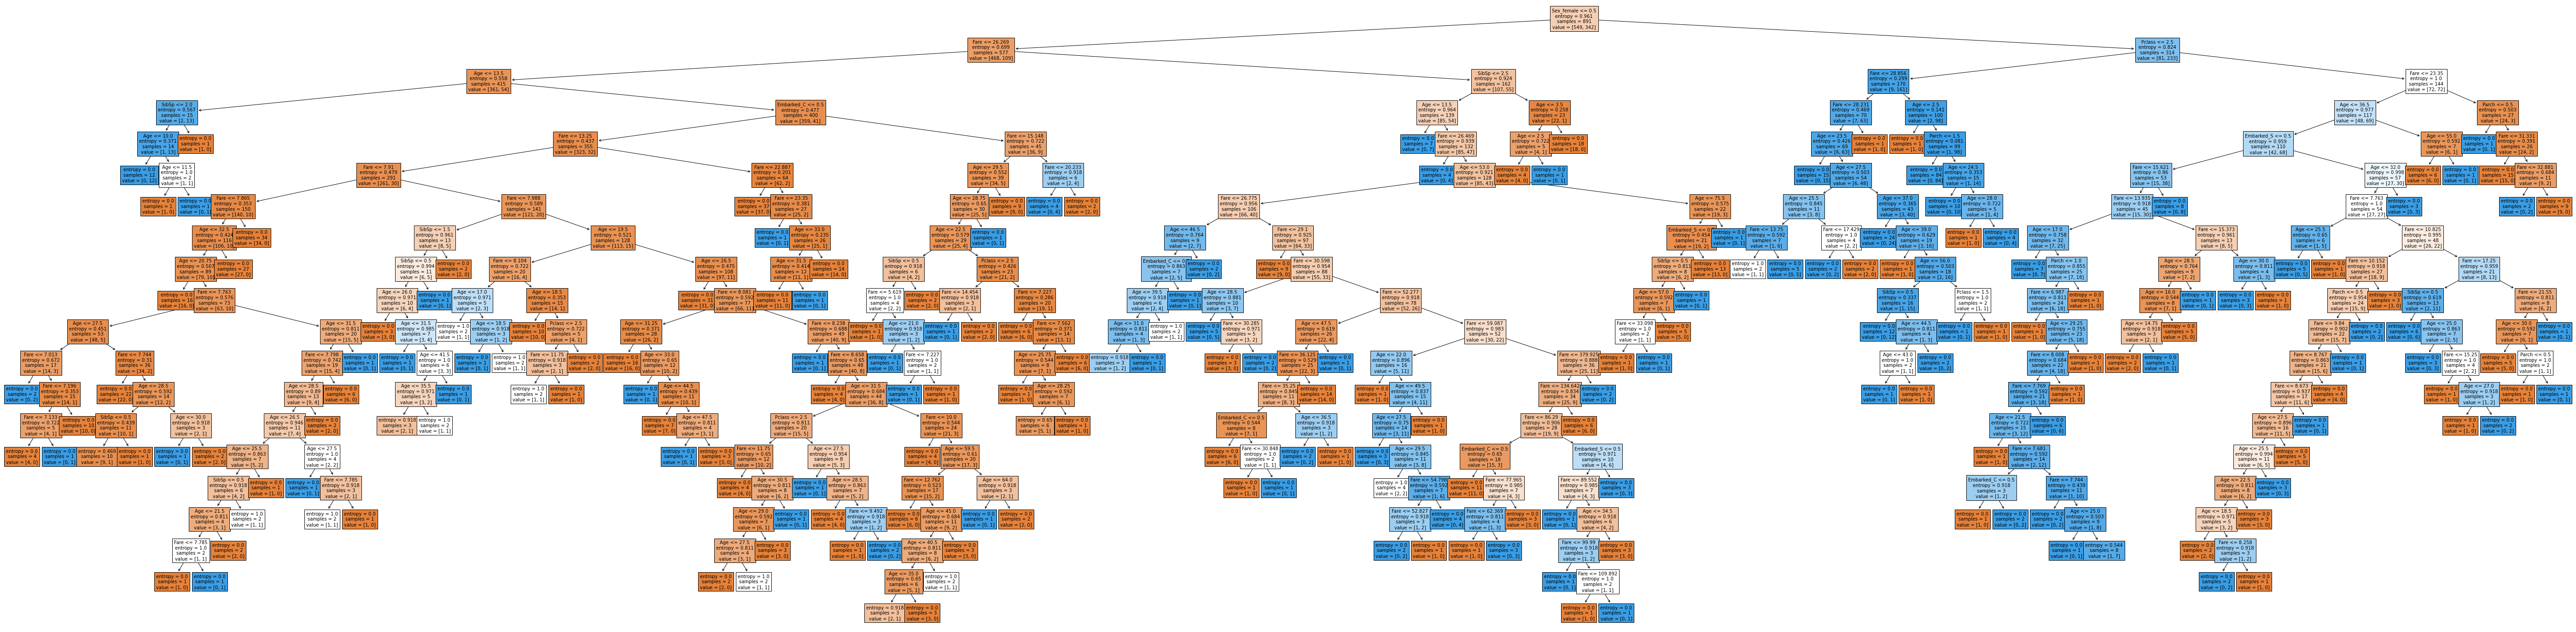

In [30]:
# Посмотрим как выгляит дерево
plt.figure(figsize=(100,25))
tree.plot_tree(clf,fontsize=10,feature_names=list(X),filled=True);

In [ ]:
# Получилось что то неудобоваримое что трудно интерпретировать.

Попробуем другой подход чтобы бороться с переобучением дерева.
Нужно запомнить что переобучение это когда модель настраивается на данные по которым она обучалась и поэтому эта модель не может адекватно работать с новыми данными

In [31]:
# Для этого разделим нашу обучающую выборку на 2 части с помощью метода
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [42]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
clf.score(X_train,y_train)

0.9798657718120806

In [45]:
# Теперь проверим на тестовых данных
clf.score(X_test,y_test)

0.7728813559322034

In [50]:
# попробуем ограничить глубину дерева
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [51]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
clf.score(X_train,y_train)

0.8406040268456376

In [54]:
# Проверим на тестовых
clf.score(X_test,y_test)

0.8101694915254237